# Análisis de Series Temporales
## Laboratorio 2
### Mario Agustín Sgró

In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set_context('notebook') 
sns.set_style('ticks')
red  = '#D62728'
blue = '#1F77B4'

plt.rcParams['figure.figsize'] = [15, 10]

## Data: Demanda eléctrica de Argentina

En este laboratorio utilizaremos los datos de demanda electrica de Argentina, para el periodo 2013-01 hasta 2019-07.

In [4]:
data = pd.read_csv('datasets/demanda.csv', index_col='TIPO', parse_dates=True)
data.index.name = "Month"
data.tail()

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
Month,,,,
2019-03-01,4004709.444,3044854.983,3072063.284,1.012163e+07
2019-04-01,3652724.519,2892482.731,3029687.889,9.574895e+06
2019-05-01,4356836.823,2973830.213,3055527.035,1.038619e+07
2019-06-01,4816838.191,2937048.667,2897618.673,1.065151e+07
2019-07-01,5704951.016,3288949.873,3035538.422,1.202944e+07


In [5]:
data.describe().round(2)

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
count,79.00,79.00,79.00,79.00
mean,4551935.29,3113096.42,3187977.02,10853008.74
std,654164.93,206829.98,124659.74,816874.81
min,3239380.70,2809183.13,2897618.67,9307334.16
25%,3990580.45,2948084.14,3109179.19,10223259.40
50%,4470715.12,3070853.24,3199317.20,10706955.32
75%,5092450.46,3270751.91,3275571.56,11476364.98
max,6193110.21,3606989.07,3460879.97,12607552.72


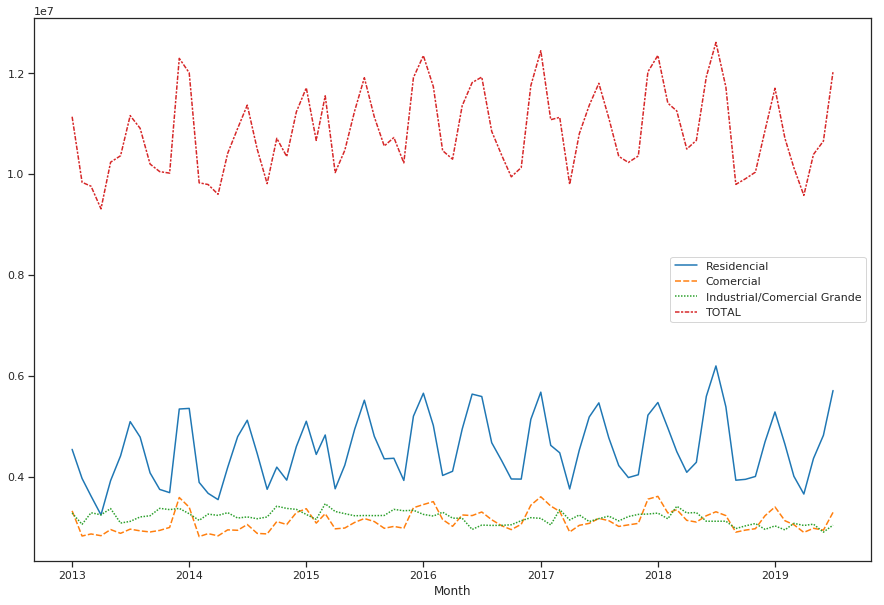

In [6]:
sns.lineplot(data=data);

### Analizamos primero la demanda residencial

In [7]:
ts = data['Residencial'].copy()
ts.index = ts.index.to_period(freq='M')

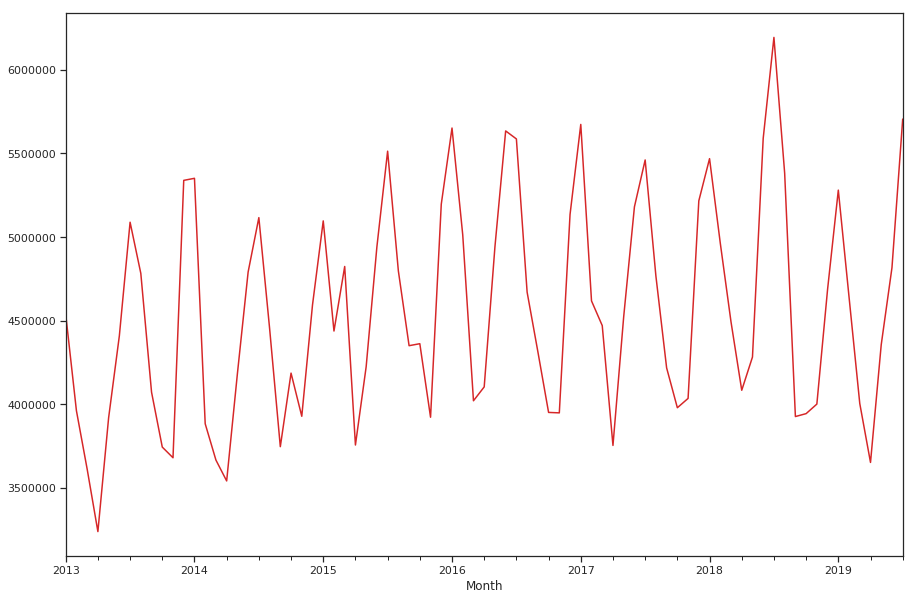

In [8]:
ts.plot(color=red);

## Descoposición de la serie temporal

Realizamos la descomposición de la serie temporal utilizando el algoritmo de X-13 ARIMA-SEATS.

In [9]:
decomposition = sm.tsa.x13_arima_analysis(ts,x12path='.')

/home/marioagustin/MiniConda/envs/diplodatos/lib/python3.6/site-packages/statsmodels/tsa/x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


In [10]:
[attr for attr in dir(decomposition) if not attr.startswith('_')]

['irregular', 'observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']

Ploteamos las componentes de la descomposición.

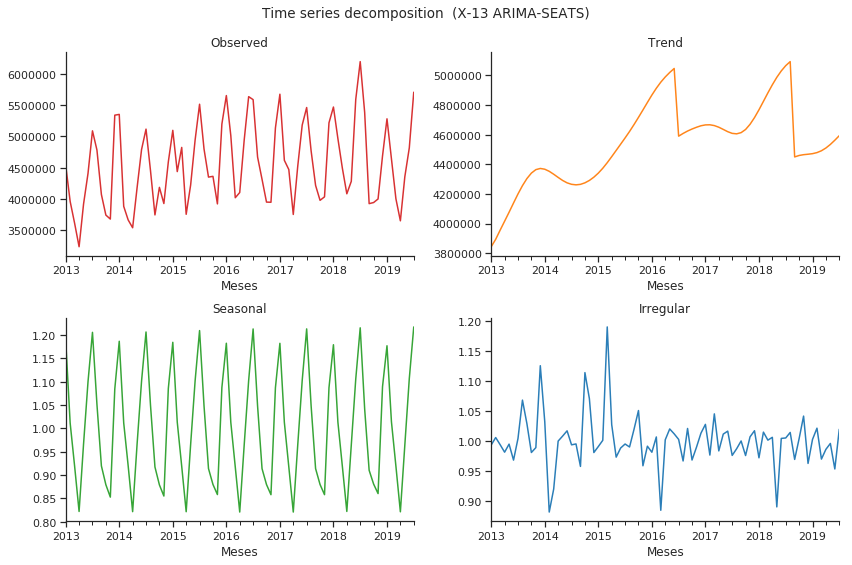

In [11]:
results=decomposition
colours=['#D62728', '#FF7F0E', '#2CA02C', '#1F77B4']
fig, ax = plt.subplots(2,2, figsize=(12,8))

decomposition.observed.plot(ax=ax[0,0],color=colours[0], alpha=0.95)
ax[0,0].set(ylabel='', title='Observed', xlabel='Meses')

decomposition.trend.plot(ax=ax[0,1],color=colours[1], alpha=0.95)
ax[0,1].set(ylabel='', title='Trend', xlabel='Meses')

y = decomposition.observed/decomposition.seasadj
y.plot(ax=ax[1,0],color=colours[2], alpha=0.95)
ax[1,0].set(ylabel='', title='Seasonal', xlabel='Meses')

decomposition.irregular.plot(ax=ax[1,1],color=colours[3], alpha=0.95)
ax[1,1].set(ylabel='', title='Irregular', xlabel='Meses')

sns.despine()
fig.suptitle('Time series decomposition  (X-13 ARIMA-SEATS)', fontsize=13.5)   
fig.tight_layout()
fig.subplots_adjust(top=0.9)

Guardamos los resultados generados por X-13-ARIMA en un archivo para inspección posterior.

In [12]:
f=open('x13results.txt', mode='w+')
f.write(decomposition.results)
f.close()

## Holt-winters exponential smoothing

Aplicamos el método de Holt-winter con diferentes configuraciones

In [32]:
def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()

In [33]:
ahw_sm = sm.tsa.ExponentialSmoothing(ts, trend='add', damped=False, 
                                         seasonal='add', seasonal_periods=12).fit()

In [34]:
hw_summary(ahw_sm)

 In-sample fit:
 RMSE               325530.419


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,8371634221242.382
Optimized:,True,AIC,2037.527
Trend:,Additive,BIC,2075.439
Seasonal:,Additive,AICC,2048.927
Seasonal Periods:,12,Date:,"Mon, 30 Sep 2019"
Box-Cox:,False,Time:,15:59:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1046688,alpha,True
smoothing_slope,3.7977e-12,beta,True


In [20]:
mhw_sm = sm.tsa.ExponentialSmoothing(ts, trend='add', damped=False, 
                                         seasonal='mul', seasonal_periods = 12).fit()
hw_summary(mhw_sm)

 In-sample fit:
 RMSE               249758.948


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,4927983037661.804
Optimized:,True,AIC,1995.664
Trend:,Additive,BIC,2033.575
Seasonal:,Multiplicative,AICC,2007.064
Seasonal Periods:,12,Date:,"Mon, 30 Sep 2019"
Box-Cox:,False,Time:,15:47:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2749452,alpha,True
smoothing_slope,6.4208e-16,beta,True


In [21]:
mhw_damped = sm.tsa.ExponentialSmoothing(ts, trend='add', damped=True, 
                                         seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_damped)

 In-sample fit:
 RMSE               250884.819


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,4972512204439.331
Optimized:,True,AIC,1998.374
Trend:,Additive,BIC,2038.655
Seasonal:,Multiplicative,AICC,2011.256
Seasonal Periods:,12,Date:,"Mon, 30 Sep 2019"
Box-Cox:,False,Time:,15:47:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2915957,alpha,True
smoothing_slope,0.0526318,beta,True


Observamos que el modelo con la configuración Holt-winter multiplicaditivo es el que mejor ajusta (menor AIC).

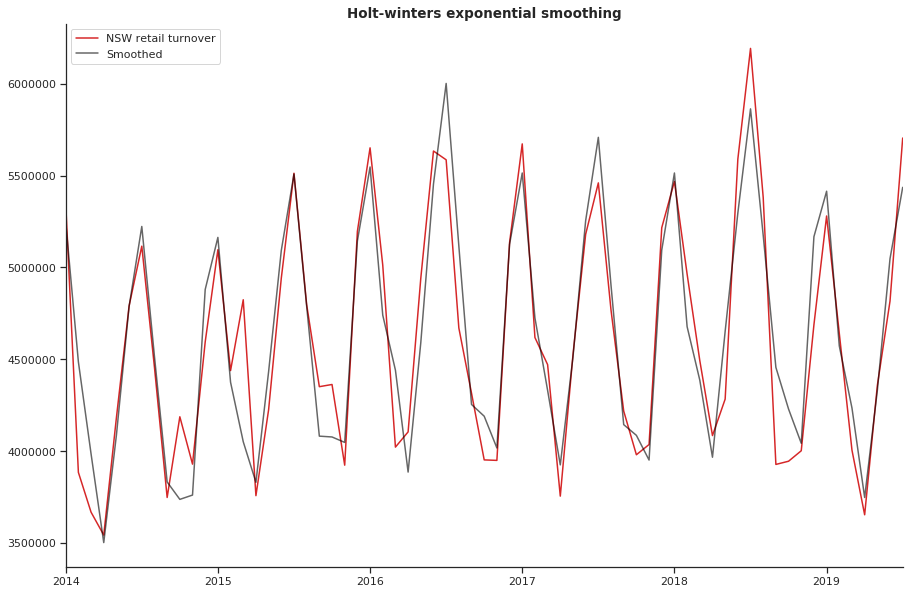

In [35]:
smoothed = pd.Series(mhw_sm.fittedvalues, index=y.index)

fig, ax= plt.subplots();#figsize=(9,6))

ts['2014':].plot(color='#D62728', label='NSW retail turnover')
smoothed['2014':].plot(color='black', label='Smoothed', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

## Diagnóstico del modelo

Veamos los residuos porcentuales

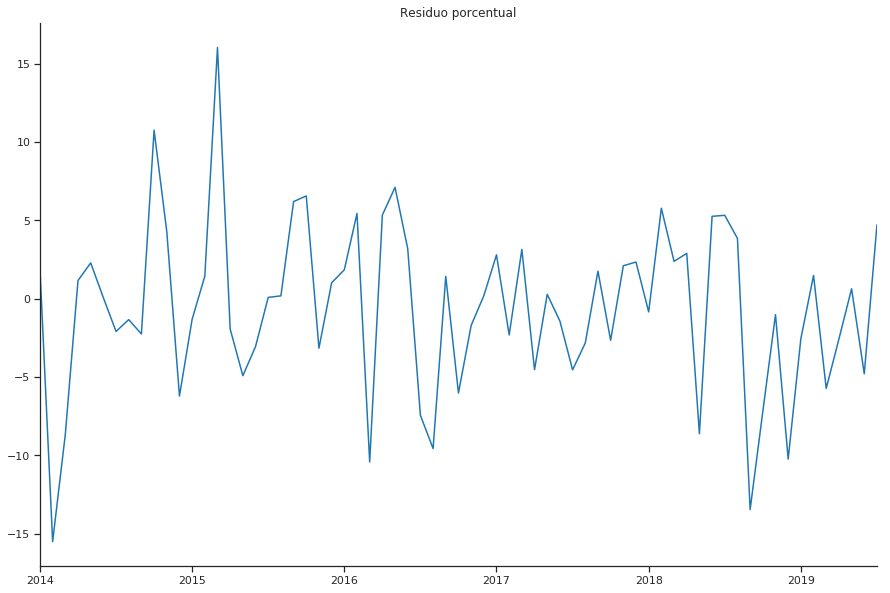

In [37]:
resid = (100.0*(ts - mhw_sm.fittedvalues)/(ts))[12:]

fig, ax= plt.subplots();
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residuo porcentual')
sns.despine()
plt.show()

y la autocorrelación entre los errores. Observamos que tienen poca correlación.

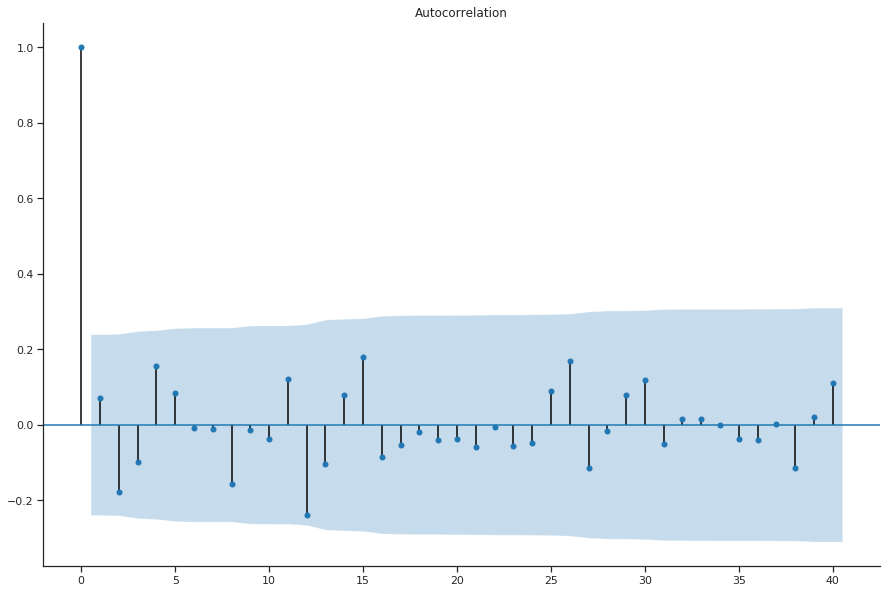

In [24]:
fig, ax = plt.subplots();
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

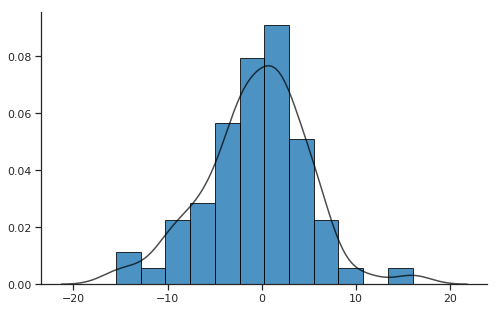

In [38]:
from plotting import histogram

histogram(resid)
plt.show()

Observamos que los residuos no siguen una distribución normal. Esto deberemos considerarlo al momento de calcular los intervalos de confianza de las predicciones.

## Validación del modelo

Realizamos la predicción de los últimos 12 meses del intervalo en los cuales tenemos los datos y las contrastamos con los datos reales observados para validar el modelo.

In [39]:
start_val = ts.index[-round(len(ts)/12*.2)*12]
start_val

Period('2018-08', 'M')

In [40]:
# Real time forecasting 

validation=ts[start_val:].index
start = ts.index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(ts)):
    
    actual.append(ts.iloc[i]) # actual value
    
     # seasonal random walk forecast
    pred1.append(ts.iloc[i-12])
    
     # additive holt winters forecast
    model = sm.tsa.ExponentialSmoothing(ts.iloc[:i], trend='add', damped=False, 
                                        seasonal='add', seasonal_periods=12).fit()
    pred2.append(model.forecast(1)[0])
    
     # multiplicate holt winters forecast
    model = sm.tsa.ExponentialSmoothing(ts.iloc[:i], trend='add', damped=False, 
                                        seasonal='mul', seasonal_periods=12).fit()
    pred3.append(model.forecast(1)[0])
    

columns=['Seasonal RW', 'Additive', 'Multiplicative', 'Actual']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

/home/marioagustin/MiniConda/envs/diplodatos/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/marioagustin/MiniConda/envs/diplodatos/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/marioagustin/MiniConda/envs/diplodatos/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [41]:
pred1_err = (np.array(pred1) - np.array(actual))/np.array(actual)
pred2_err = (np.array(pred2) - np.array(actual))/np.array(actual)
pred3_err = (np.array(pred3) - np.array(actual))/np.array(actual)

errors = np.vstack([pred1_err,pred2_err,pred3_err]).T
errors = pd.DataFrame(errors, columns=columns[:-1], index=validation)

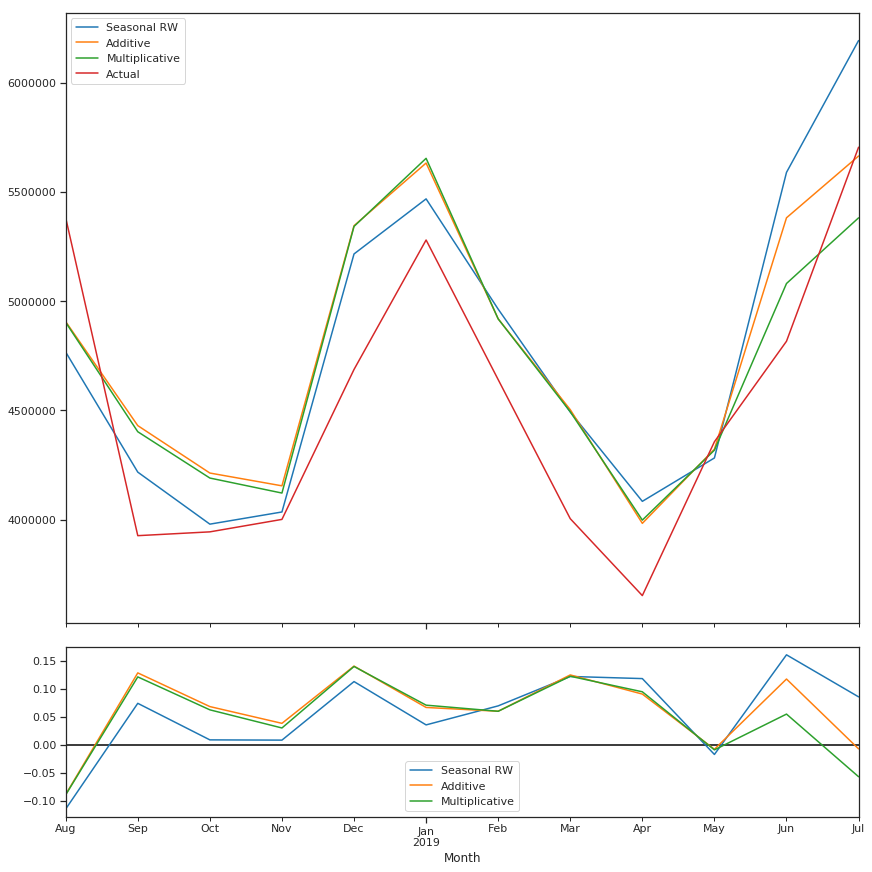

In [42]:
f = plt.figure(constrained_layout=True,figsize=(12,12))

gs = GridSpec(3, 1, figure=f)
ax1 = f.add_subplot(gs[0:2,0])
ax2 = f.add_subplot(gs[2,0],sharex=ax1)

results.plot(ax=ax1)
errors.plot(ax=ax2)
ax2.hlines(0.0,validation.min(),validation.max())

In [43]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
Seasonal RW,423173.552,104886.183
Additive,396881.239,91686.893
Multiplicative,377600.725,96441.984


Observamos que el modelo multiplicativo tiene el menor RMSE.

## Predicciones

Realizamos la predicciones para 24 meses después del último valos observado utilizando el método Holt-winters multiplicativo.

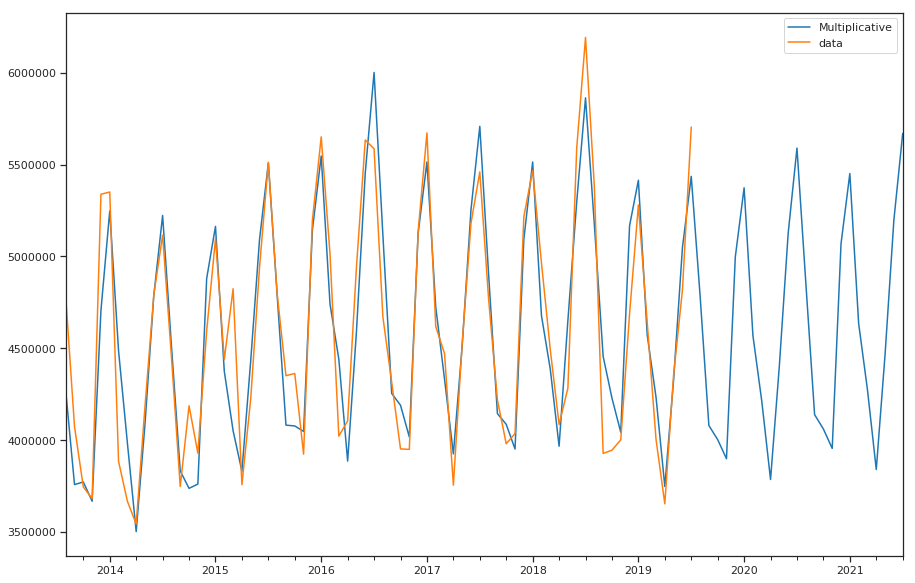

In [31]:
h=2*12 #M
w=h*3

model = sm.tsa.ExponentialSmoothing(ts, trend='add', damped=False, 
                                    seasonal='mul', seasonal_periods=12).fit()

plot = pd.DataFrame()
plot['Multiplicative'] = pd.concat([model.fittedvalues, model.forecast(h)])
plot['data'] = ts

plot[-(w+h):].plot();